### Import Packages



In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics
import plotly.express as px
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import sys, os

### Load Dataset



In [2]:
#Original scientific paper concluded that 'Age', ‘Family_diabetes’, ‘Physically active’, ‘Regular Medicine’ and ‘Pdiabetes’ were the most important factors and prove useful to predicting whether or not someone has diabetes. They used a ratio of 75:25.

In [68]:
diabetes = pd.read_csv("./Data/diabetes_dataset__2019.csv")

In [48]:
diabetes.head()

,BMI,Sleep,SoundSleep,Pregancies,Diabetic,Age_40-49,Age_50-59,Age_60 or older,Age_less than 40,Gender_Female,...,BPLevel_High,BPLevel_Low,BPLevel_high,BPLevel_low,BPLevel_normal,BPLevel_normal,Pdiabetes_0,Pdiabetes_yes,UriationFreq_not much,UriationFreq_quite often
0,39.0,8.0,6.0,0.0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,28.0,8.0,6.0,0.0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
2,24.0,6.0,6.0,0.0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
3,23.0,8.0,6.0,0.0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
4,27.0,8.0,8.0,0.0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [5]:
diabetes.tail()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6.0,5.0,yes,occasionally,sometimes,high,0.0,0,quite often,yes
949,60 or older,Male,no,yes,none,23.0,no,no,6.0,5.0,yes,occasionally,sometimes,high,0.0,0,not much,no
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6.0,5.0,yes,occasionally,very often,high,0.0,0,not much,no
951,60 or older,Female,yes,yes,one hr or more,30.0,no,no,7.0,4.0,yes,occasionally,sometimes,high,2.0,0,quite often,yes
952,$$$$$$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(diabetes.columns)
print("")
print(diabetes.shape)

Index(['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'BMI',
       'Smoking', 'Alcohol', 'Sleep', 'SoundSleep', 'RegularMedicine',
       'JunkFood', 'Stress', 'BPLevel', 'Pregancies', 'Pdiabetes',
       'UriationFreq', 'Diabetic'],
      dtype='object')

(953, 18)


In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               953 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    float64
 9   SoundSleep        952 non-null    float64
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

### **Data Cleaning**



In [69]:
#cleaning the data -- dropping missing and duplicate values for sanity
diabetes.dropna(inplace = True)
diabetes = diabetes.reset_index(drop=True)

length = len(diabetes.index) #save length of array of later
length

905

In [70]:
#converting categorical variables into dummy variables
col_category = ['Age','Gender','Family_Diabetes','highBP','PhysicallyActive','Smoking','Alcohol','RegularMedicine',
                'JunkFood','Stress','BPLevel','Pdiabetes','UriationFreq']
for col in col_category:
    diabetes = pd.concat([diabetes.drop(col, axis=1), pd.get_dummies(diabetes[col], prefix=col, prefix_sep='_')], axis=1)

In [71]:
#coverting target variable (yes/no) into 0s and 1s
diabetes['Diabetic'] = diabetes['Diabetic'].replace('no', 0)
diabetes['Diabetic'] = diabetes['Diabetic'].replace(' no', 0)
diabetes['Diabetic'] = diabetes['Diabetic'].replace('yes', 1)
diabetes['Diabetic']

0      0
1      0
2      0
3      0
4      0
      ..
900    1
901    1
902    0
903    0
904    1
Name: Diabetic, Length: 905, dtype: int64

### Exploratory Data Analysis



In [11]:
#the relationship between pregnancies and glucose levels
import plotly.express as px
fig = px.violin(diabetes, x="Gender_Female", y="Age_60 or older",color="Gender_Female",
            title=" Age, Gender and Body Mass Index of Diabetic Patitents")

fig.show()

In [12]:
#BMI, age, diabetic
df = diabetes
fig = px.bar(df, x="Diabetic", y="BMI", barmode="group", color = "Age_60 or older", title="BMI in Diabetics and Non-Diabetics relating to age group")
fig.show()

In [13]:
# Stress always and Quality Sleep
df = diabetes
fig = px.violin(df, x="Stress_always", y="SoundSleep", color= "Diabetic", title="Quality sleep in relation to stress")
fig.show()

In [14]:
# Stress always and Quality Sleep
df = diabetes
fig = px.violin(df, x="Stress_not at all", y="SoundSleep", color= "Diabetic", title="Quality sleep in relation to stress")
fig.show()

In [15]:
# Blood Pressure and Alcohol
df = diabetes
fig = px.bar(df, x="Alcohol_yes", y="BPLevel_high", color="BPLevel_high") 
fig.update_layout(
    title="Alcohol and blood pressure",)

fig.show()

In [16]:
# Gender and BMI
df= diabetes
fig = px.bar(df, x="Gender_Female", y="BMI", color="BMI")

fig.update_layout(
    title="Gender and Body Mass Index",)

fig.show()

In [17]:
# BMI and Gender
df= diabetes
fig = px.violin(df, x="Gender_Male", y="BMI", color="Gender_Male")

fig.update_layout(
    title="BMI of Males",)

fig.show()

In [18]:
# sleep and Age
df= diabetes
fig = px.scatter(df, x="Sleep", y="Age_60 or older", color="Age_60 or older")

fig.update_layout(
    title="Sleep concived through different Age categories",)

fig.show()

In [19]:
df = diabetes
fig = px.bar(df, x="Diabetic", y="BMI", barmode='group', color = "Diabetic", height=400, title='BMI of diabetics compared to non-diabetics')
fig.show()

In [20]:
#BMI, age, diabetic
fig = px.bar(df, x="Stress_not at all", y="Age_60 or older", color = "Age_60 or older", 
             title="")
fig.show()

In [21]:
#BMI, age, diabetic
fig = px.bar(df, x="Stress_always", y="Gender_Female", barmode="group", color = "Age_60 or older", title="BMI in Diabetics and Non-Diabetics relating to age group")
fig.show()

In [22]:

fig = px.bar(df, x="Diabetic", y="Stress_always", barmode="group", color = "Age_60 or older", title="BMI in Diabetics and Non-Diabetics relating to age group")
fig.show()

In [23]:
#BMI, age, diabetic
fig = px.bar(df, x="JunkFood_very often", y="Diabetic", barmode="group", color = "Diabetic",
             title="Determining if Junkfood affects Diabetic People")
fig.show()

In [24]:
#Age and Physical Activity
fig = px.violin(df, x= "PhysicallyActive_one hr or more", y="Age_60 or older", color="Diabetic", title = 'Physical Activity Relating to Age in Diabetic and Non Diabetic People')
fig.show()

In [25]:
#Age and Physical Activity
fig = px.violin(df, x= "PhysicallyActive_none", y="Age_60 or older", color="Diabetic")
fig.show()

In [26]:
#Blood Pressure and Physical Activity in older people
fig = px.violin(df, x= "PhysicallyActive_less than half an hr", y="BPLevel_high", color="Age_60 or older",
               title='Physical Activity affect Blood Pressure in older people')
fig.show()

In [27]:
#BMI, age, diabetic
fig = px.bar(df, x="Stress_always", y="Smoking_yes", barmode="group", color = "Stress_always", title="Does Smoking affect Stress levels?")
fig.show()

In [28]:
#Family_diabetes Pdiabetes 
fig = px.bar(df, x= "Family_Diabetes_yes", y="Pdiabetes_yes", barmode = 'group', color="Diabetic")
fig.show()

In [29]:
#Family_diabetes Pdiabetes 
fig= px.violin(df, x= "RegularMedicine_yes", y="Age_60 or older", color="Diabetic")
fig.show()

In [30]:
df = diabetes
fig = px.bar(df, x="Stress_very often", y="SoundSleep", barmode="group", color = "SoundSleep", title=" Sleep Concived Affecting Stress")
fig.show()

### Model fitting



In [72]:
def conf_matrix(y, y_pred):
    fig, ax =plt.subplots(figsize=(3,3))
    labels=['No','Yes']
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Blues", fmt='g', cbar=False)
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values')
    plt.title('Pass or fail')
    ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

def get_scores(y, y_pred, y_prob):
    data={'Accuracy': np.round(accuracy_score(y, y_pred),3),
    'Precision':np.round(precision_score(y, y_pred),3),
    'Recall':np.round(recall_score(y, y_pred),3),
    'F1':np.round(f1_score(y, y_pred),3),
    'ROC AUC':np.round(roc_auc_score(y, y_prob),3)}
    scores_df = pd.Series(data).to_frame('scores')
    return scores_df

In [73]:
X = diabetes["BMI"].to_numpy().reshape(-1, 1)
y = diabetes["Pdiabetes_yes"].to_numpy().reshape(-1, 1)

In [34]:
diabetes

,BMI,Sleep,SoundSleep,Pregancies,Diabetic,Age_40-49,Age_50-59,Age_60 or older,Age_less than 40,Gender_Female,...,BPLevel_High,BPLevel_Low,BPLevel_high,BPLevel_low,BPLevel_normal,BPLevel_normal,Pdiabetes_0,Pdiabetes_yes,UriationFreq_not much,UriationFreq_quite often
0,39.0,8.0,6.0,0.0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,28.0,8.0,6.0,0.0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
2,24.0,6.0,6.0,0.0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
3,23.0,8.0,6.0,0.0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
4,27.0,8.0,8.0,0.0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,25.0,8.0,6.0,0.0,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
901,27.0,6.0,5.0,0.0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
902,23.0,6.0,5.0,0.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
903,27.0,6.0,5.0,0.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0


In [75]:
#split data into training and testing
train, test = train_test_split(diabetes, test_size = 0.25, shuffle = True)

In [76]:
xcols = train.columns
x_train = train[xcols]
x_test = test[xcols]
y_train = train['Diabetic']
y_test = test['Diabetic']

,scores
Accuracy,1.0
Precision,1.0
Recall,1.0
F1,1.0
ROC AUC,1.0


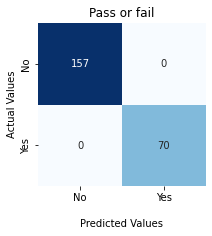

In [134]:
#SVMS
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV

clf = svm.SVC(C= 0.1, gamma= 1, kernel= 'poly', probability= True)
clf.fit(x_train,y_train)
y_pred_clf = clf.predict(x_test)
y_prob_clf = clf.predict_proba(x_test)

conf_matrix(y_test, y_pred_clf)
get_scores(y_test, y_pred_clf, y_prob_clf[:, 1])

,scores
Accuracy,1.0
Precision,1.0
Recall,1.0
F1,1.0
ROC AUC,1.0


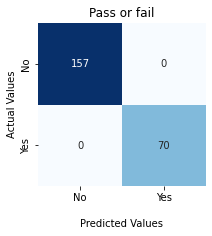

In [139]:
#SVM WITH STANDARD SCALER
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#'svm__C': 0.1, 'svm__gamma': 1, 'svm__kernel': 'linear'
clf2 = Pipeline(steps = [("scaler", StandardScaler()), ('svm', SVC(kernel = 'linear', gamma='auto',  C = 0.1, probability = True))])
clf2.fit(x_train, y_train)
y_pred_clf2 = clf2.predict(x_test)
y_prob_clf2 = clf2.predict_proba(x_test)
conf_matrix(y_test, y_pred_clf2)
get_scores(y_test, y_pred_clf2, y_prob_clf2[:, 1])

,scores
Accuracy,1.0
Precision,1.0
Recall,1.0
F1,1.0
ROC AUC,1.0


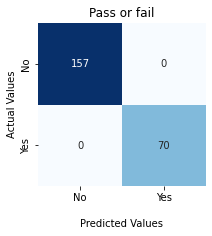

In [132]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter = 500, C = 1, penalty='l2')
reg.fit(x_train, y_train)
y_pred_reg = reg.predict(x_test)
y_prob_reg = reg.predict_proba(x_test)
conf_matrix(y_test, y_pred_reg)
get_scores(y_test, y_pred_reg, y_prob_reg[:, 1])

In [0]:
#RANDOM FORESTS
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion= 'gini', max_depth= 4, max_features='sqrt', n_estimators=200)
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)
y_prob_rfc = rfc.predict_proba(x_test)
conf_matrix(y_test, y_pred_rfc)
get_scores(y_test, y_pred_rfc, y_prob_rfc[:, 1])
#acc_rfc = accuracy_score(y_test, y_pred_rfc)
#f1_rfc = f1_score(y_test, y_pred_rfc)

In [41]:
# hyperparameter tuning

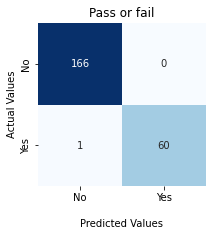

In [42]:
# term 1 RANDOM FOREST
conf_matrix(y_test, y_pred_rfc)
get_scores(y_test, y_pred_rfc, y_prob_rfc[:, 1])
acc_rfc = accuracy_score(y_test, y_pred_rfc)
f1_rfc = f1_score(y_test, y_pred_rfc)

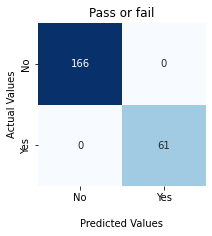

In [43]:
# term 2 LOGISTIC REGRESSION
conf_matrix(y_test, y_pred_reg) 
get_scores(y_test, y_pred_reg, y_prob_reg[:, 1])
acc_reg = accuracy_score(y_test, y_pred_reg)
f1_reg = f1_score(y_test, y_pred_reg)

In [133]:
# random forest
grid_params_rfc = {'criterion' :['gini'],'bootstrap': [True, False],
 'max_depth': [4,5,6,7,8,10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

gs_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_params_rfc, cv= 5)
gs_rfc_res = gs_rfc.fit(x_train, y_train)
print(gs_rfc_res.best_params_)

KeyboardInterrupt: 

In [118]:
# logistic regression
# dictionary = {key:value}
# parameters = {parameter: []}
# https://stackoverflow.com/questions/19018333/gridsearchcv-on-logisticregression-in-scikit-learn

dictionary = {}
grid_params_reg = {'penalty':['l2'],
                   'C':[1, 10, 100, 1000]}

gs_reg = GridSearchCV(estimator = LogisticRegression(max_iter=500),
                           param_grid = grid_params_reg,
                           cv = 5,
                           verbose=0)
gs_reg_res = gs_reg.fit(x_train, y_train)

error_score = 'raise'

print(gs_reg_res.best_params_)

{'C': 1, 'penalty': 'l2'}


In [86]:
# svm
# https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

# fitting the model for grid search


# define parameter
grid_params_svm = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto'],
              'kernel': ['rbf','poly','linear','sigmoid']}


# save grid search into gs_svm
gs_svm = GridSearchCV(estimator = svm.SVC(probability=True),
                           param_grid = grid_params_svm,
                           cv = 5,
                           verbose=0)


# fit the model
gs_svm_res = gs_svm.fit(x_train, y_train)
print(gs_svm_res.best_params_)

{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}


In [136]:
# svm with standard scaler
# https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/


pipeline =Pipeline(steps = [("scaler", StandardScaler()), ('svm', SVC(probability = True))])


print(pipeline)

grid_params_svm2 = {'svm__C': [0.1, 1, 10, 100, 1000],
              'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto'],
              'svm__kernel': ['rbf','poly','linear','sigmoid']}

gs_svm2 = GridSearchCV(estimator = pipeline,
                           param_grid = grid_params_svm2,
                           cv = 5,
                           verbose=0)

gs_svm_res2 = gs_svm2.fit(x_train, y_train)
print(gs_svm_res2.best_params_)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(probability=True))])


{'svm__C': 0.1, 'svm__gamma': 1, 'svm__kernel': 'linear'}
